In [216]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from numpy.fft import rfft, fft, fftfreq, ifft
from numpy import abs
from scipy.optimize import curve_fit
from fractions import Fraction
import math

%matplotlib inline

plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['axes.grid'] = True


In [217]:
def plot_SIR(equations, t, parameters, y0, print_vals=True, plot=True, ret=False):
    sol = odeint(equations, y0, t, args=parameters)
    
    if plot:
        plt.plot(t, sol[:,0], label="S")
        plt.plot(t, sol[:,1], label="I")
        plt.plot(t, sol[:,2], label="R")
        plt.xlabel("t")
        plt.ylabel("fraction of people")
        plt.plot([], [], ' ', label=r"$\beta$ : " + str(parameters[0]))        
        plt.plot([], [], ' ', label=r"$\gamma$:" + str(parameters[1]))
        if equations.__name__ == "SIR_mortality" or equations.__name__ == "SIR_with_demography":
            plt.plot([], [], ' ', label=r"$\mu$:" + str(parameters[2]))
        if equations.__name__ == "SIR_mortality":
            plt.plot([], [], ' ', label=r"$\rho$:" + str(parameters[3]))
            
        plt.plot([], [], ' ', label=r"$S_{(0)}$:" + str(y0[0]))  
        plt.plot([], [], ' ', label=r"$I_{(0)}$:" + str(y0[1]))
        plt.plot([], [], ' ', label=r"$R_{(0)}$:" + str(y0[2])) 
        
        plt.legend()
        
    if print_vals:
        if equations.__name__ == "SIR_without_demography":
            print("beta: " + str(parameters[0]))
            print("gamma: " + str(parameters[1]))
            print("R0: " + str(parameters[0] / parameters[1]) + "\n")
            
        print("S_0: " + str(y0[0]))
        print("I_0: " + str(y0[1]))
        print("R_0: " + str(y0[2]))
        
    if ret:
        return sol

# Problem 1

In [218]:
t = np.linspace(0, 100, 300)

def SIR_without_demography(y, t, beta, gamma):
    S, I, R = y
    ds_dt = -beta * S * I
    di_dt = beta * S * I - gamma * I
    dr_dt = gamma * I
    return ds_dt, di_dt, dr_dt   

## 1

Epidemic, 1 < $R_0$

beta: 3
gamma: 1
R0: 3.0

S_0: 0.99
I_0: 0.01
R_0: 0.0


(0, 10)

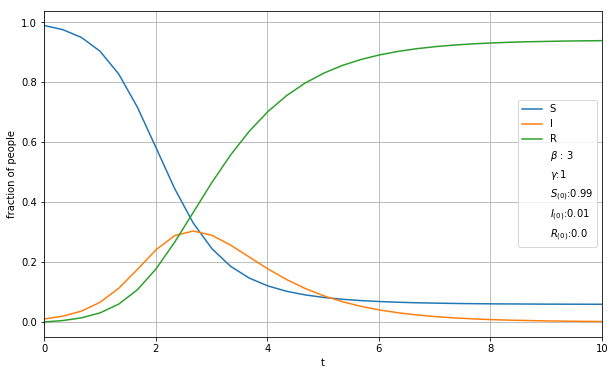

In [219]:
beta = 3
gamma = 1
S_0 = 0.99
I_0 = 0.01
R_0 = 0.0

plot_SIR(SIR_without_demography, t, (beta, gamma), (S_0, I_0, R_0))
plt.xlim(0, 10)

beta: 2
gamma: 3
R0: 0.6666666666666666

S_0: 0.99
I_0: 0.01
R_0: 0.0


(0, 10)

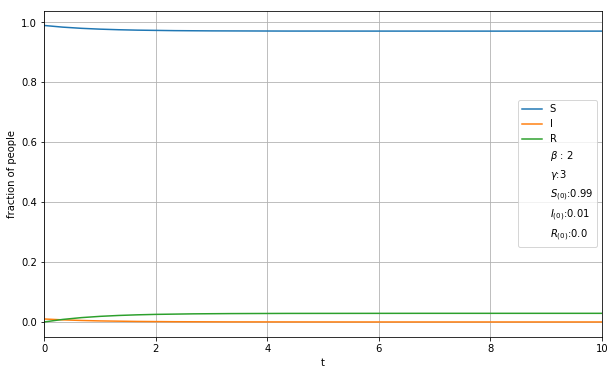

In [220]:
beta = 2
gamma = 3

plot_SIR(SIR_without_demography, t, (beta, gamma), (S_0, I_0, R_0))
plt.xlim(0, 10)

In [221]:
def phaseplot(equations, t, steps, parameters):
   
    for (s, i) in steps:
        S_0 = s
        I_0 = i
        R_0 = 1 - S_0 - I_0
        
        sol = odeint(equations, (S_0, I_0, R_0), t, args=parameters)
        plt.plot(sol[:,0][0], sol[:,1][0], 'bo') # point
        plt.plot(sol[:,0], sol[:,1], 'b') # line

    plt.xlabel("S")
    plt.ylabel("I")
    
    R0 = parameters[0] / parameters[1]
    dydt = 1 / R0
    
    plt.plot([dydt, dydt], [0.0, 1.0], "r--", label="dy/dt = 0")
    plt.legend()


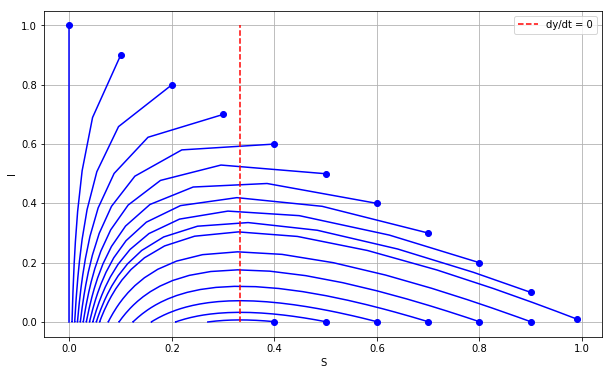

In [222]:
y0s = [(0.4, 0.001), (0.5, 0.001), (0.6, 0.001), (0.7, 0.001), (0.8, 0.001), (0.9, 0.001),
       (0.0, 1.0), (0.1, 0.9), (0.2, 0.8), (0.3, 0.7), (0.4, 0.6), (0.5, 0.5), (0.6, 0.4), (0.7, 0.3), (0.8, 0.2), (0.9, 0.1), (0.99, 0.01)]

phaseplot(SIR_without_demography, t, y0s, (3, 1))

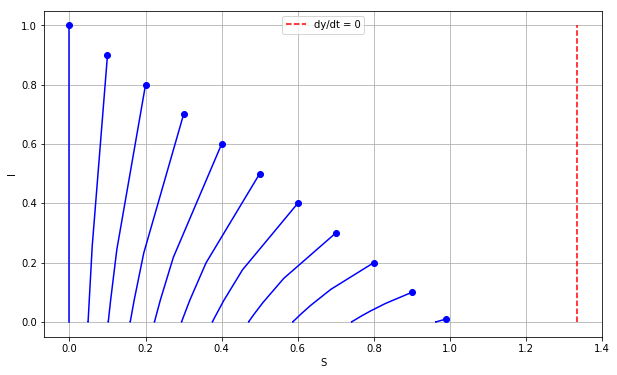

In [223]:
y0s = [(0.0, 1.0), (0.1, 0.9), (0.2, 0.8), (0.3, 0.7), (0.4, 0.6), (0.5, 0.5), (0.6, 0.4), (0.7, 0.3), (0.8, 0.2), (0.9, 0.1), (0.99, 0.01)]


phaseplot(SIR_without_demography, t, y0s, (3, 4))

## 2

In [224]:
days = np.arange(1, 15)
infected = np.array([3, 8, 28, 75, 221, 291, 255, 235, 190, 125, 70, 28, 12, 5])

N = 763
X = N - infected[0]
Y = infected[0]
Z = 0

S_0 = X/N
I_0 = Y/N
R_0 = Z/N

print(I_0)

0.00393184796855


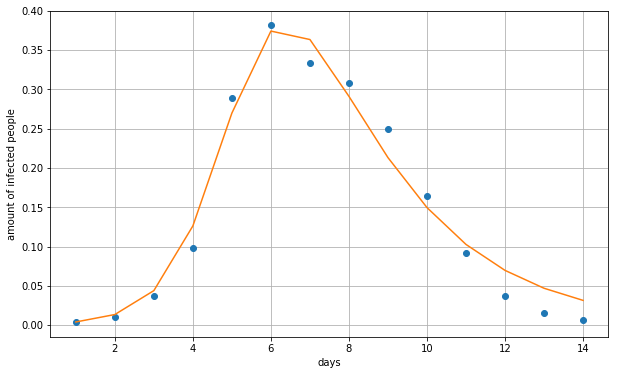

In [225]:
def fit_odeint(x, beta, gamma):
    return odeint(SIR_without_demography, (S_0, I_0, R_0), x, args=(beta, gamma))[:,1]

popt, pcov = curve_fit(fit_odeint, days, infected/N)
fitted = fit_odeint(days, *popt)

plt.plot(days, infected/N, 'o')
plt.plot(days, fitted)
plt.xlabel("days")
plt.ylabel("amount of infected people")
plt.show()

In [226]:
beta = popt[0]
gamma = popt[1]

beta: 1.69316860748
gamma: 0.450944193434
R0: 3.75471872603

S_0: 0.996068152031
I_0: 0.00393184796855
R_0: 0.0


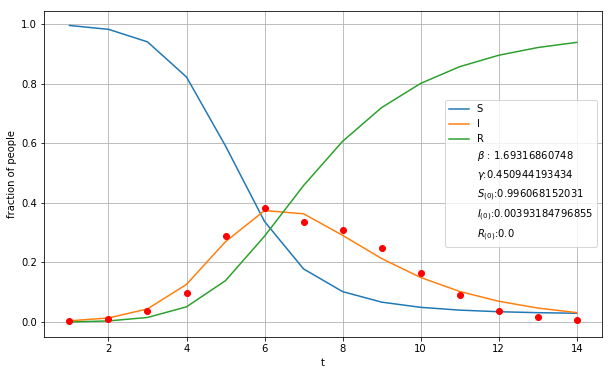

In [227]:
plot_SIR(SIR_without_demography, days, (popt[0], popt[1]), (S_0, I_0, R_0))
plt.plot(days, infected/N, 'ro')

In [228]:
new_S_0 = 1 / (popt[0] / popt[1])
print(1/new_S_0)

3.75471872603


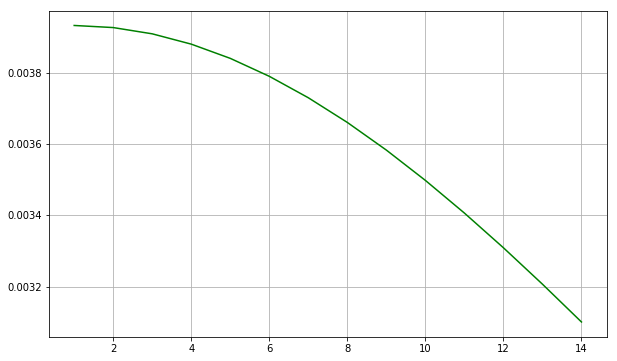

In [229]:
s = plot_SIR(SIR_without_demography, days, (popt[0], popt[1]), (new_S_0, I_0, R_0), False, False, True)

plt.plot(days, s[:,1], "g")

(0, 0.04)

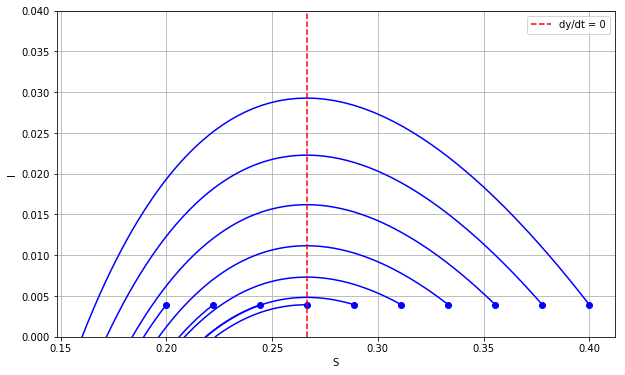

In [230]:
y0s = list(zip(np.linspace(0.2, 0.4, 10), [I_0]*10))



# for s0, i0 in 
# y0s = list(zip(np.linspace(0, 1, 10), [I_0]*10))

# print(list(y0s))


phaseplot(SIR_without_demography, t, y0s, (beta, gamma))
plt.ylim(0, 0.04)

# Problem 2

In [231]:
t = np.linspace(0, 300, 400)

In [232]:
def SIR_with_demography(y, t, beta, gamma, mu):
    S, I, R = y
    ds_dt = mu - beta * S * I - mu * S
    di_dt = beta * S * I - gamma * I - mu * I
    dr_dt = gamma * I - mu * R
    return ds_dt, di_dt, dr_dt

In [242]:
def get_freq_an(beta, gamma, mu):
    R0 = beta / (gamma + mu)
    A = 1 / (mu * (R0 - 1))
    G = 1 / (mu + gamma)

    return 1 / (2 * np.pi * math.sqrt(A * G))

In [243]:
beta = 1
gamma = 1/3
mu = 1/60

freq_an = get_freq_an(beta, gamma, mu)

S_0 = 0.9
I_0 = 0.1

(0, 200)

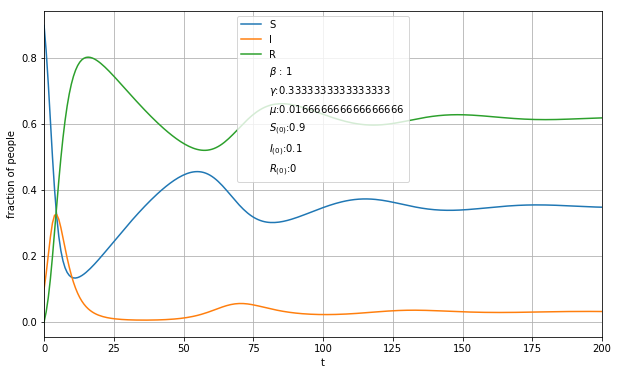

In [244]:
SIR_demo = plot_SIR(SIR_with_demography, t, (beta, gamma, mu), (S_0, I_0, 0), False, ret=True)
plt.xlim(0, 200)

In [245]:
def get_fourier(equation):
    fourier = fft(equation)
    N = fourier.size
    T = t[1] - t[0]
    
    freq = fftfreq(N, T)
    
    return freq[:N // 2], abs(fourier[:N // 2] / N)

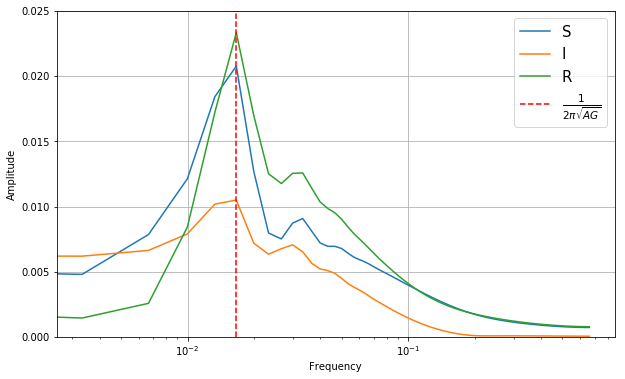

In [246]:
s_class = get_fourier(SIR_demo[:,0])
i_class = get_fourier(SIR_demo[:,1])
r_class = get_fourier(SIR_demo[:,2])

ax = plt.gca()
plt.xlabel("Frequency")
plt.ylabel("Amplitude")
plt.plot(s_class[0], s_class[1], label="S")
plt.plot(i_class[0], i_class[1], label="I")
plt.plot(r_class[0], r_class[1], label="R")
plt.plot([freq_an, freq_an], [0.0, 0.03], "r--", label=r"$\frac{1}{2 \pi \sqrt{AG}}$")
ax.set_xscale('log')
plt.ylim(0, 0.025)
plt.legend(fontsize="15")
plt.show()

In [247]:
def max_freq(freq, amp):
    return freq[np.where(amp == np.amax(amp))]

In [254]:
tmp0 = np.delete(i_class[0], 0)
tmp1 = np.delete(i_class[1], 0)

print(max_freq(tmp0, tmp1))

[ 0.016625]


In [255]:
tmp0 = np.delete(i_class[0], 0)
tmp1 = np.delete(i_class[1], 0)

print(max_freq(tmp0, tmp1))

[ 0.016625]


In [256]:
tmp0 = np.delete(r_class[0], 0)
tmp1 = np.delete(r_class[1], 0)

print(max_freq(tmp0, tmp1))

[ 0.016625]


## 2

In [350]:
def SIR_mortality(y, t, beta, gamma, mu, rho):
    S, I, R = y
    ds_dt = mu - beta * S * I - mu * S
    di_dt = beta * S * I - ((gamma + mu) / (1 - rho)) * I
    dr_dt = gamma * I - mu * R
    return ds_dt, di_dt, dr_dt

In [386]:
beta = 1
gamma = 1/3
mu = 1/60

S_0 = 0.9
I_0 = 0.1
R_0 = 0.0

1.0


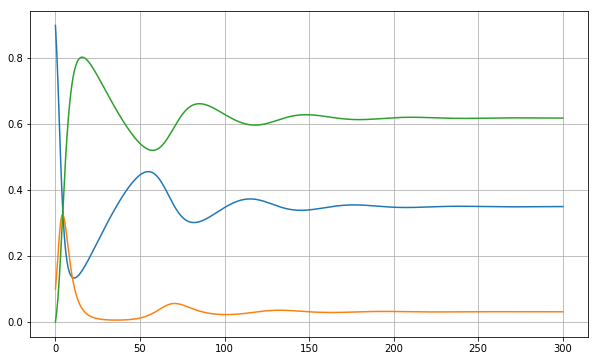

In [396]:
rho = 0.0

sol = odeint(SIR_mortality, (S_0, I_0, R_0), t, args=(beta, gamma, mu, rho))
    
plt.plot(t, sol)

S_0: 0.9
I_0: 0.1
R_0: 0.0


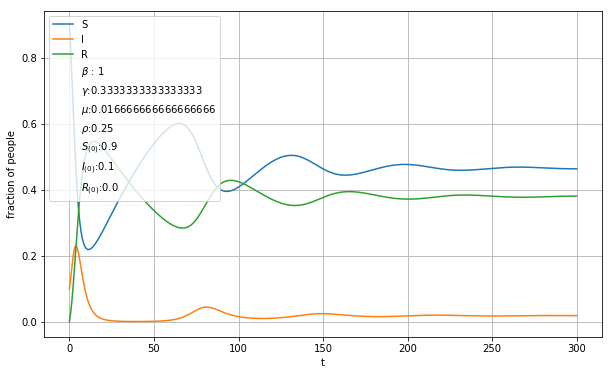

In [374]:
plot_SIR(SIR_mortality, t, (beta, gamma, mu, 0.25), (S_0, I_0, R_0))

S_0: 0.9
I_0: 0.1
R_0: 0.0


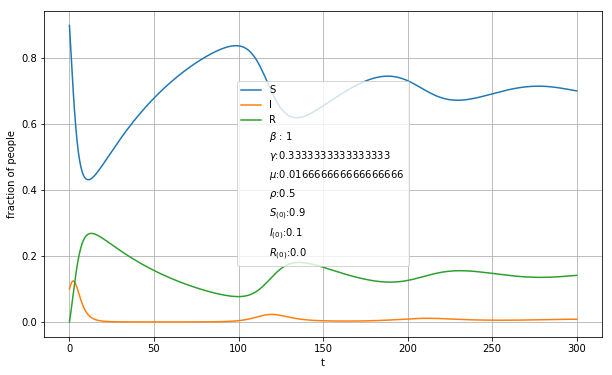

In [375]:
plot_SIR(SIR_mortality, t, (beta, gamma, mu, 0.50), (S_0, I_0, R_0))

S_0: 0.9
I_0: 0.1
R_0: 0.0
0.99872335186


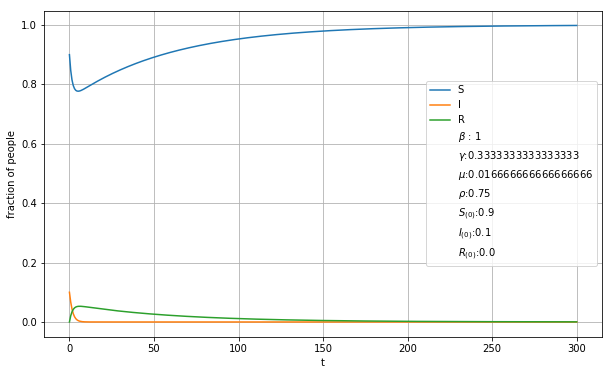

In [398]:
k = plot_SIR(SIR_mortality, t, (beta, gamma, mu, 0.75), (S_0, I_0, R_0), ret=True)
print(np.sum(k[-1]))

Text(0,0.5,'i')

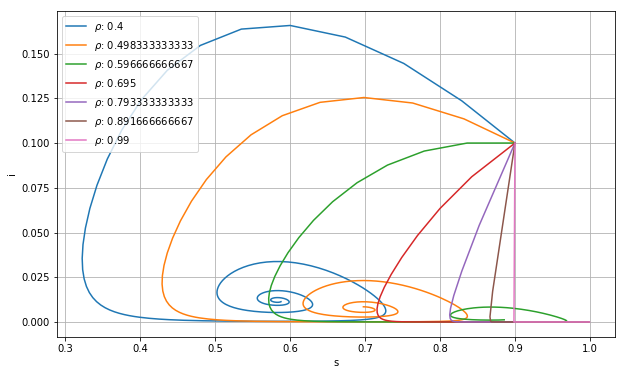

In [377]:


for rho in np.linspace(0.4, 0.99, 7):
    tmp = plot_SIR(SIR_mortality, t, (beta, gamma, mu, rho), (S_0, I_0, R_0), False, plot=False, ret=True)
    plt.plot(tmp[:,0], tmp[:,1], label=r"$\rho$: " + str(rho))
plt.legend()
plt.xlabel("s")
plt.ylabel("i")

# Problem 3

In [340]:
def SEIR(y, t, beta0, gamma, mu, sigma, delta, tau):
    S, E, I, R = y
    beta = beta0 * (1 + delta * np.cos(2 * np.pi * t / tau))
    ds_dt = mu - (beta * I + mu) * S
    de_dt = beta * S * I - (mu + sigma) * E
    di_dt = sigma * E - (mu + gamma) * I
    dr_dt = gamma * I - mu * R
    return ds_dt, de_dt, di_dt, dr_dt

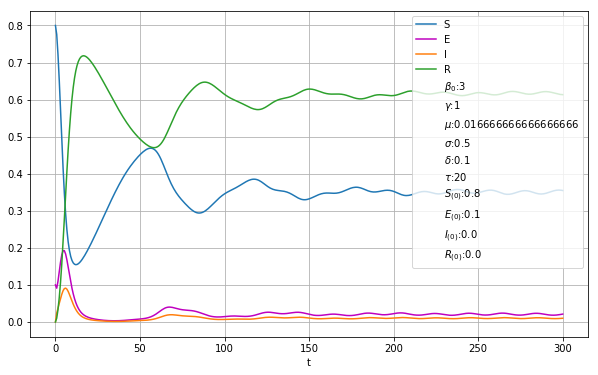

In [399]:
beta0 = 3
gamma = 1
mu = 1/60
sigma = 0.5
delta = 0.1
tau = 20

S_0 = 0.8
E_0 = 0.1
I_0 = 0.0
R_0 = 0.0

sol = odeint(SEIR, (S_0, E_0, I_0, R_0), t, args=(beta0, gamma, mu, sigma, delta, tau))

plt.plot(t, sol[:,0], label="S")
plt.plot(t, sol[:,1], "m", label="E")
plt.plot(t, sol[:,2], label="I")
plt.plot(t, sol[:,3], label="R")

plt.plot([], [], ' ', label=r"$\beta_0$:" + str(beta0))
plt.plot([], [], ' ', label=r"$\gamma$:" + str(gamma))
plt.plot([], [], ' ', label=r"$\mu$:" + str(mu))
plt.plot([], [], ' ', label=r"$\sigma$:" + str(sigma))
plt.plot([], [], ' ', label=r"$\delta$:" + str(delta))
plt.plot([], [], ' ', label=r"$\tau$:" + str(tau))

plt.plot([], [], ' ', label=r"$S_{(0)}$:" + str(S_0))  
plt.plot([], [], ' ', label=r"$E_{(0)}$:" + str(E_0))
plt.plot([], [], ' ', label=r"$I_{(0)}$:" + str(I_0)) 
plt.plot([], [], ' ', label=r"$R_{(0)}$:" + str(R_0)) 
        
plt.xlabel("t")
plt.legend()

In [400]:
R0 = beta0 / (gamma + mu)
A = 1 / (mu * (R0 - 1))
G = 1 / (mu + gamma)

freqqq = 1 / (2 * np.pi * math.sqrt(A * G))

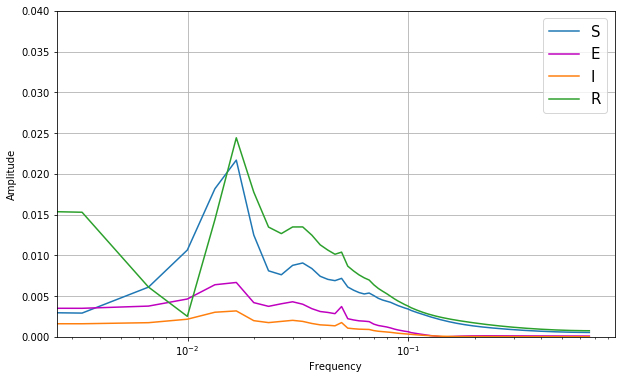

In [402]:


s_class = get_fourier(sol[:,0])
i_class = get_fourier(sol[:,2])
r_class = get_fourier(sol[:,3])
e_class = get_fourier(sol[:,1])


ax = plt.gca()
plt.xlabel("Frequency")
plt.ylabel("Amplitude")
plt.plot(s_class[0], s_class[1], label="S")
plt.plot(e_class[0], e_class[1], "m", label="E")
plt.plot(i_class[0], i_class[1], label="I")
plt.plot(r_class[0], r_class[1], label="R")
# plt.plot([freqqq, freqqq], [0.0, 1.0], "r--", label="dy/dt = 0")

ax.set_xscale('log')
plt.ylim(0, 0.04)
plt.legend(fontsize="15")
plt.show()